In [15]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [16]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

KeyboardInterrupt: 

Split the data into training, testing, and validation sets

In [ ]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [ ]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomPosterize(bits=4, p=0.1),
    transforms.RandomSolarize(threshold=128, p=0.1),
    transforms.RandomEqualize(p=0.1),
    transforms.ToTensor()
    # Add any additional preprocessing steps here
])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    # new_input.show()
    # break
    train_subset.dataset.data[idx] = (new_input, label)
    



100%|██████████| 21000/21000 [05:23<00:00, 64.90it/s] 


In [ ]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [ ]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [ ]:
saved_models = []

model = models.OccModel()
training_info = model.train_model(train, test, epochs=50, early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:41<00:00,  2.04it/s]


Loss: 0.0099, Mean Absolute Error: 0.09101033079972927, Time remaining: 2:26:16.149116


Epoch 2/50 (Training): 100%|██████████| 329/329 [02:07<00:00,  2.59it/s]


Loss: 0.0020, Mean Absolute Error: 0.0795312411290534, Time remaining: 2:09:10.779360


Epoch 3/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.0013, Mean Absolute Error: 0.07031678400458173, Time remaining: 2:03:19.028674


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:10<00:00,  1.73it/s]


Loss: 0.0010, Mean Absolute Error: 0.06729707860962507, Time remaining: 2:10:04.010860


Epoch 5/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0009, Mean Absolute Error: 0.06251709416825721, Time remaining: 2:04:12.408060


Epoch 6/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.0008, Mean Absolute Error: 0.06231887404747466, Time remaining: 1:59:48.028760


Epoch 7/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0007, Mean Absolute Error: 0.05920213522349901, Time remaining: 1:55:24.249279


Epoch 8/50 (Training): 100%|██████████| 329/329 [02:13<00:00,  2.46it/s]


Loss: 0.0007, Mean Absolute Error: 0.05985666393361827, Time remaining: 1:51:51.377484


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:10<00:00,  1.73it/s]


Loss: 0.0008, Mean Absolute Error: 0.05926290439798477, Time remaining: 1:52:59.624577


Epoch 10/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.0006, Mean Absolute Error: 0.0578308664856756, Time remaining: 1:49:33.389560


Epoch 11/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0006, Mean Absolute Error: 0.058646705179931, Time remaining: 1:45:56.483250


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0006, Mean Absolute Error: 0.06353469210815557, Time remaining: 1:45:59.304978


Epoch 13/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0010, Mean Absolute Error: 0.059439729918983386, Time remaining: 1:42:18.108229


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0006, Mean Absolute Error: 0.05289072135185942, Time remaining: 1:41:20.605776


Epoch 15/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0005, Mean Absolute Error: 0.051746287759631235, Time remaining: 1:37:43.859190


Epoch 16/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0004, Mean Absolute Error: 0.05219214629540418, Time remaining: 1:34:24.763834


Epoch 17/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.0004, Mean Absolute Error: 0.06211033364401219, Time remaining: 1:31:03.856233


Epoch 18/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0010, Mean Absolute Error: 0.06570691072401848, Time remaining: 1:27:54.693632


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.73it/s]


Loss: 0.0009, Mean Absolute Error: 0.05886480448014559, Time remaining: 1:26:35.153724


Epoch 20/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0005, Mean Absolute Error: 0.04979230534840137, Time remaining: 1:23:17.310450


Epoch 21/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0003, Mean Absolute Error: 0.0476238096053613, Time remaining: 1:20:11.196947


Epoch 22/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.0002, Mean Absolute Error: 0.0481628196195085, Time remaining: 1:17:06.608700


Epoch 23/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0002, Mean Absolute Error: 0.047946680317375256, Time remaining: 1:14:04.759008


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0002, Mean Absolute Error: 0.04700028507950458, Time remaining: 1:12:09.528606


Epoch 25/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.0002, Mean Absolute Error: 0.05047066470092915, Time remaining: 1:09:10.549000


Epoch 26/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.0002, Mean Absolute Error: 0.05513899230418053, Time remaining: 1:06:12.517176


Epoch 27/50 (Training): 100%|██████████| 329/329 [02:13<00:00,  2.47it/s]


Loss: 0.0005, Mean Absolute Error: 0.05064160549180939, Time remaining: 1:03:21.422313


Epoch 28/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0002, Mean Absolute Error: 0.04633467763345292, Time remaining: 1:00:25.554856


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0002, Mean Absolute Error: 0.045665638442052174, Time remaining: 0:58:12.315246


Epoch 30/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.51it/s]


Loss: 0.0001, Mean Absolute Error: 0.04452450563536679, Time remaining: 0:55:16.024100


Epoch 31/50 (Training): 100%|██████████| 329/329 [02:10<00:00,  2.52it/s]


Loss: 0.0001, Mean Absolute Error: 0.04497827335875085, Time remaining: 0:52:19.155775


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.04454816112968516, Time remaining: 0:49:58.180962


Epoch 33/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.50it/s]


Loss: 0.0001, Mean Absolute Error: 0.04512066855788865, Time remaining: 0:47:05.372953


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.75it/s]


Loss: 0.0001, Mean Absolute Error: 0.04645210754205572, Time remaining: 0:44:37.741776


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.048162893570484, Time remaining: 0:42:10.391220


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:12<00:00,  1.71it/s]


Loss: 0.0001, Mean Absolute Error: 0.04421355991445957, Time remaining: 0:39:39.893502


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:12<00:00,  1.71it/s]


Loss: 0.0001, Mean Absolute Error: 0.043813146135591445, Time remaining: 0:37:04.629940


Epoch 38/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0001, Mean Absolute Error: 0.043458634908211995, Time remaining: 0:34:06.421992


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.04392923809033125, Time remaining: 0:31:27.519183


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.04533969966615451, Time remaining: 0:28:45.079850


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.044000190563816974, Time remaining: 0:26:01.190994


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.0444878876367782, Time remaining: 0:23:14.736704


Epoch 43/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.04494712014306099, Time remaining: 0:20:26.692544


Epoch 44/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.04533723791308226, Time remaining: 0:17:36.318456


Epoch 45/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0001, Mean Absolute Error: 0.04409377738595643, Time remaining: 0:14:37.646705


Epoch 46/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.043868145132635504, Time remaining: 0:11:45.482916


Epoch 47/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.0441220681916209, Time remaining: 0:08:51.247653


Epoch 48/50 (Training): 100%|██████████| 329/329 [03:10<00:00,  1.73it/s]


Loss: 0.0001, Mean Absolute Error: 0.0495482538529533, Time remaining: 0:05:55.429732


Epoch 49/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.73it/s]


Loss: 0.0001, Mean Absolute Error: 0.04349500450127302, Time remaining: 0:02:58.353768


Epoch 50/50 (Training): 100%|██████████| 329/329 [03:08<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.043847823148949985, Time remaining: 0:00:00


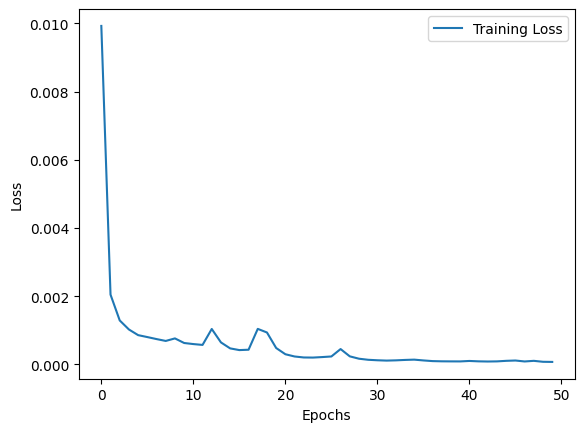

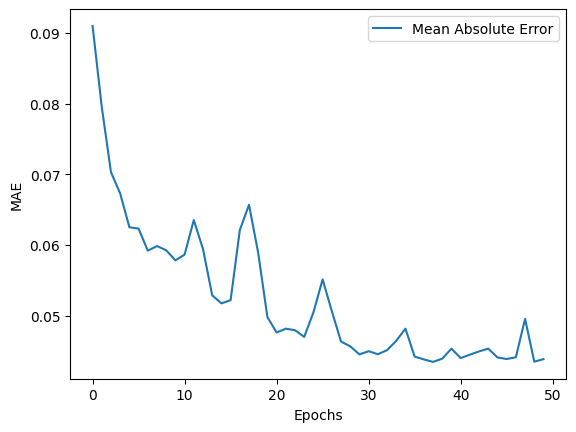

In [ ]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 94/94 [00:14<00:00,  6.47it/s]


[0.04216018319129944, 0.022839609533548355, 0.026785705238580704, 0.052536945790052414, 0.07781833410263062, 0.025551820173859596, 0.05369547754526138, 0.05091100558638573, 0.06537167727947235, 0.036771081387996674, 0.033328473567962646, 0.053712598979473114, 0.026292623952031136, 0.12271672487258911, 0.03441118448972702, 0.04353490471839905, 0.03281306475400925, 0.02667362429201603, 0.05321834608912468, 0.049921706318855286, 0.061434630304574966, 0.04608774930238724, 0.06103448569774628, 0.043087221682071686, 0.0340072438120842, 0.03192921727895737, 0.03271723538637161, 0.03167121112346649, 0.029103592038154602, 0.026604488492012024, 0.023411426693201065, 0.21632221341133118, 0.03430808335542679, 0.03711448982357979, 0.05648746341466904, 0.03637351468205452, 0.02774505689740181, 0.025701669976115227, 0.024310601875185966, 0.047464869916439056, 0.024394627660512924, 0.02755897119641304, 0.04317580163478851, 0.06355785578489304, 0.021279379725456238, 0.05716947093605995, 0.0654859542846

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


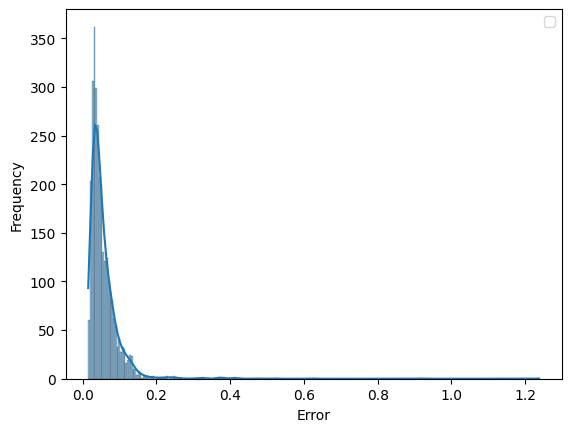

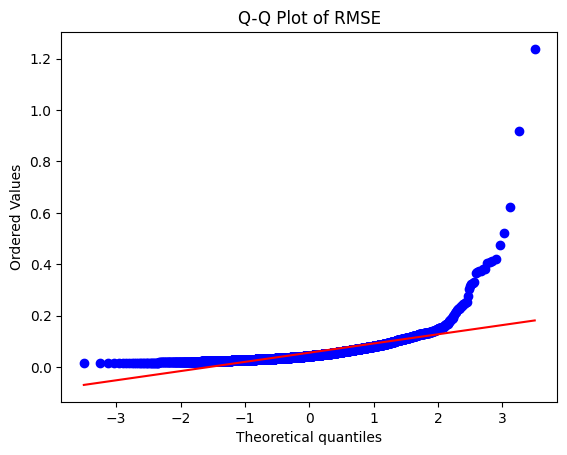

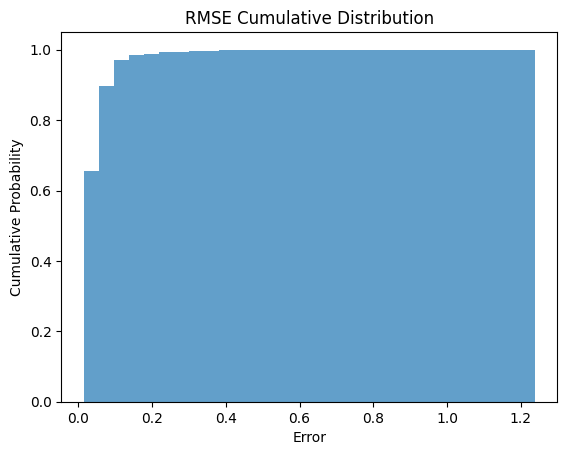

(3000, 21, 3)


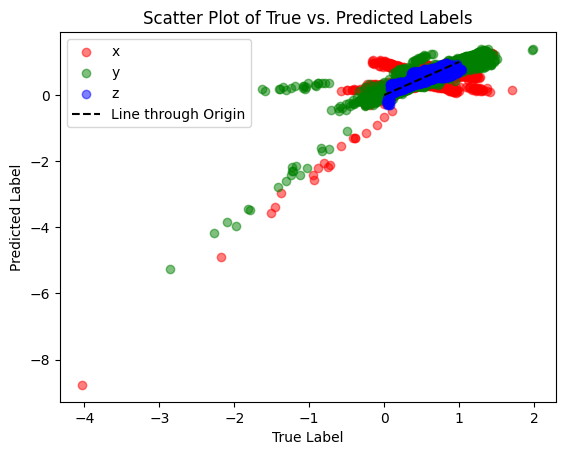

In [ ]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [ ]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [ ]:
old_model = model

tensor([[0.4825, 0.5824, 0.4608],
        [0.4781, 0.5784, 0.4523],
        [0.5087, 0.4998, 0.4686],
        [0.5240, 0.4720, 0.4696],
        [0.5495, 0.4694, 0.4910],
        [0.4736, 0.4689, 0.4800],
        [0.4959, 0.4257, 0.4649],
        [0.5282, 0.4387, 0.4779],
        [0.4975, 0.4459, 0.4992],
        [0.4616, 0.5043, 0.4903],
        [0.5056, 0.4801, 0.4905],
        [0.4991, 0.4814, 0.4869],
        [0.5021, 0.4932, 0.4962],
        [0.4658, 0.5446, 0.4978],
        [0.4873, 0.5588, 0.4976],
        [0.4970, 0.5600, 0.4971],
        [0.4966, 0.5730, 0.5065],
        [0.4814, 0.6092, 0.5004],
        [0.4863, 0.5978, 0.5017],
        [0.5003, 0.6115, 0.4994],
        [0.5129, 0.6231, 0.5011]], device='cuda:0', grad_fn=<SelectBackward0>)


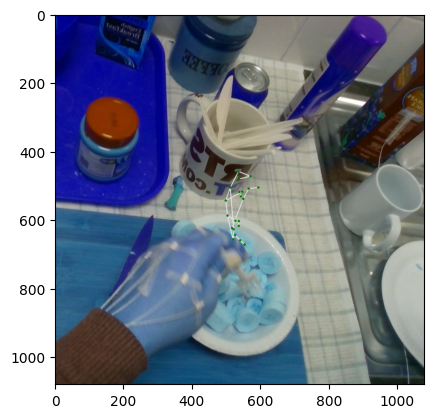

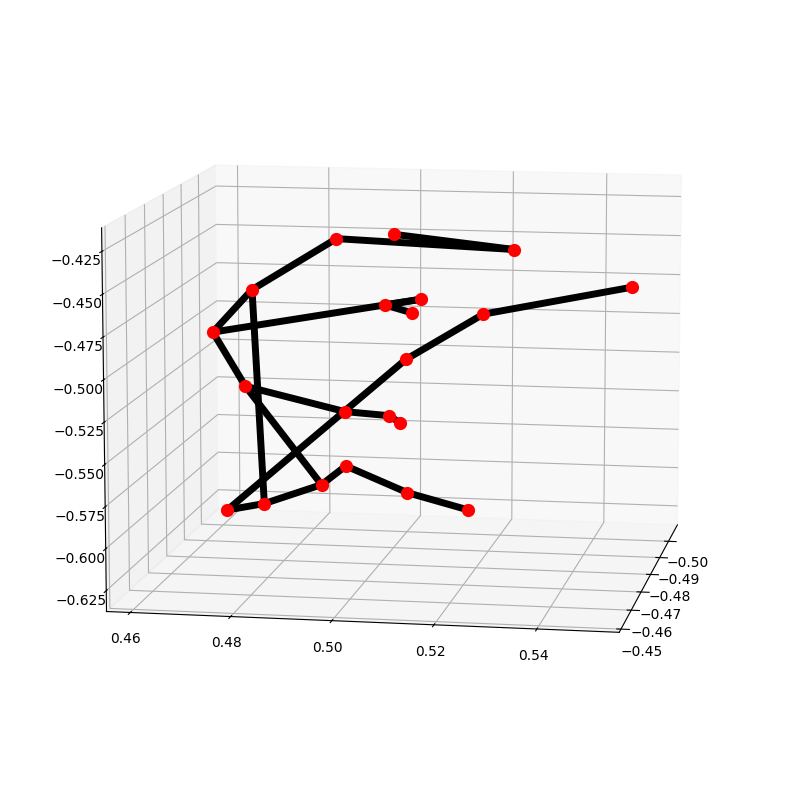

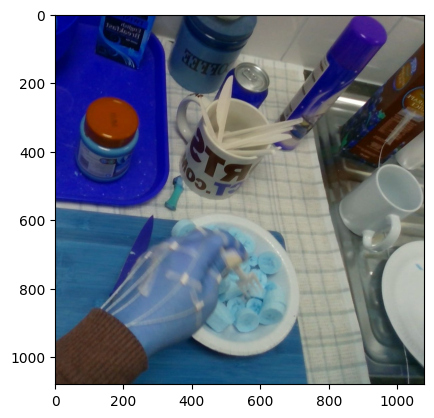

In [19]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

# reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00000099.jpg"
file = "/home/devcontainers/third-year-project/data/split_F-PHAB/left/00099000.jpeg"
image = Image.open(file)

# model = models.OccModel().to(device)

# model.load_state_dict(torch.load("models/points_20240103-024547.pt"))
# model.load_state_dict(torch.load("models/points_20240104-022118.pt"))
# model = old_model
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))

print(joints[0])

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

# img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
# mp_drawing.draw_landmarks(
#             img,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
# plt.imshow(img)
# plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))